#scarica i dati dal repository ufficiale

In [58]:
#@title
!rm *.csv

!wget https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv  -O dpc-covid19-ita-andamento-nazionale.csv

--2022-01-06 18:33:40--  https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 89379 (87K) [text/plain]
Saving to: ‘dpc-covid19-ita-andamento-nazionale.csv’

dpc-covid19-ita-and 100%[===================>]  87.28K  --.-KB/s    in 0.02s   

2022-01-06 18:33:40 (4.95 MB/s) - ‘dpc-covid19-ita-andamento-nazionale.csv’ saved [89379/89379]



#importa le librerie necessarie per il funzionamento del codice

In [59]:
#@title
import pandas as pd
import plotly.graph_objects as go

#estrai le informazioni con pandas

In [60]:
#@title
nome_file='dpc-covid19-ita-andamento-nazionale.csv'

df = pd.read_csv(nome_file)

#filtro data
start_date = '2021-01-01'
end_date = '2025-01-01'
after_start_date = df['data'] >= start_date
before_end_date = df['data'] <= end_date
between_two_dates = after_start_date & before_end_date
df = df.loc[between_two_dates]

#calcolo colonne e queries sul df
df['tamponi_odierni'] = (df.groupby(['stato'])['tamponi']
                          .diff()
                          .fillna(df['tamponi']))
df['deceduti_odierni'] = (df.groupby(['stato'])['deceduti']
                          .diff()
                          .fillna(df['deceduti']))
def div(x, y):
    return (x / y)*100
df['tasso_di_positivita'] = div(df['nuovi_positivi'], df['tamponi_odierni'])

#conversione colonne in lista per i grafici
data = df.data.to_list()
stato = df.stato.to_list()
ricoverati_con_sintomi = df.ricoverati_con_sintomi.to_list()
terapia_intensiva = df.terapia_intensiva.to_list()
totale_ospedalizzati = df.totale_ospedalizzati.to_list()
isolamento_domiciliare = df.isolamento_domiciliare.to_list()
totale_positivi = df.totale_positivi.to_list()
variazione_totale_positivi = df.variazione_totale_positivi.to_list()
nuovi_positivi = df.nuovi_positivi.to_list()
dimessi_guariti = df.dimessi_guariti.to_list()
deceduti = df.deceduti.to_list()
casi_da_sospetto_diagnostico = df.casi_da_sospetto_diagnostico.to_list()
casi_da_screening = df.casi_da_screening.to_list()
totale_casi = df.totale_casi.to_list()
tamponi = df.tamponi.to_list()
casi_testati = df.casi_testati.to_list()
note = df.note.to_list()
ingressi_terapia_intensiva = df.ingressi_terapia_intensiva.to_list()
note_test = df.note_test.to_list()
note_casi = df.note_casi.to_list()
totale_positivi_test_molecolare = df.totale_positivi_test_molecolare.to_list()
totale_positivi_test_antigenico_rapido = df.totale_positivi_test_antigenico_rapido.to_list()
tamponi_test_molecolare = df.tamponi_test_molecolare.to_list()
tamponi_test_antigenico_rapido = df.tamponi_test_antigenico_rapido.to_list()
tamponi_odierni = df.tamponi_odierni.to_list()
deceduti_odierni = df.deceduti_odierni.to_list()
tasso_di_positivita = df.tasso_di_positivita.to_list()

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371 entries, 312 to 682
Data columns (total 27 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   data                                    371 non-null    object 
 1   stato                                   371 non-null    object 
 2   ricoverati_con_sintomi                  371 non-null    int64  
 3   terapia_intensiva                       371 non-null    int64  
 4   totale_ospedalizzati                    371 non-null    int64  
 5   isolamento_domiciliare                  371 non-null    int64  
 6   totale_positivi                         371 non-null    int64  
 7   variazione_totale_positivi              371 non-null    int64  
 8   nuovi_positivi                          371 non-null    int64  
 9   dimessi_guariti                         371 non-null    int64  
 10  deceduti                                371 non-null    int6

#informazioni più importanti

In [61]:
#@title
mydf = df[['data','tamponi_odierni','tasso_di_positivita','totale_ospedalizzati','nuovi_positivi','terapia_intensiva','deceduti_odierni']]
mydf.tail()

,data,tamponi_odierni,tasso_di_positivita,totale_ospedalizzati,nuovi_positivi,terapia_intensiva,deceduti_odierni
678,2022-01-02T17:00:00,278654.0,21.907455,13075,61046,1319,133.0
679,2022-01-03T17:00:00,445321.0,15.281561,13684,68052,1351,140.0
680,2022-01-04T17:00:00,1228410.0,13.907734,14304,170844,1392,259.0
681,2022-01-05T17:00:00,1094255.0,17.281986,14792,189109,1428,231.0
682,2022-01-06T17:00:00,1138310.0,19.277789,15294,219441,1467,198.0


#grafico nuovi positivi covid-19

                    data  nuovi_positivi
366  2022-01-02T17:00:00           61046
367  2022-01-03T17:00:00           68052
368  2022-01-04T17:00:00          170844
369  2022-01-05T17:00:00          189109
370  2022-01-06T17:00:00          219441


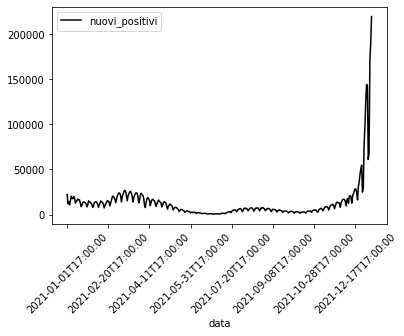

In [62]:
#@title
df_nuovi_positivi = pd.DataFrame({'data':data, 'nuovi_positivi': nuovi_positivi})
print(df_nuovi_positivi.tail())
df_nuovi_positivi.plot(x='data', rot=45, color = 'black')

#grafico totale ospedalizzati covid-19

                    data  totale_ospedalizzati
366  2022-01-02T17:00:00                 13075
367  2022-01-03T17:00:00                 13684
368  2022-01-04T17:00:00                 14304
369  2022-01-05T17:00:00                 14792
370  2022-01-06T17:00:00                 15294


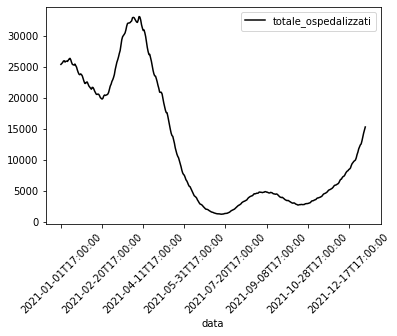

In [63]:
#@title
df_totale_ospedalizzati = pd.DataFrame({'data':data, 'totale_ospedalizzati': totale_ospedalizzati})
print(df_totale_ospedalizzati.tail())
df_totale_ospedalizzati.plot(x='data', rot=45, color = 'black')

#grafico terapia intensiva covid-19

                    data  terapia_intensiva
366  2022-01-02T17:00:00               1319
367  2022-01-03T17:00:00               1351
368  2022-01-04T17:00:00               1392
369  2022-01-05T17:00:00               1428
370  2022-01-06T17:00:00               1467


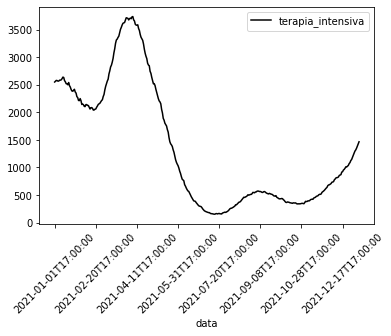

In [64]:
#@title
df_terapia_intensiva = pd.DataFrame({'data':data, 'terapia_intensiva': terapia_intensiva})
print(df_terapia_intensiva.tail())
df_terapia_intensiva.plot(x='data', rot=45, color = 'black')

#grafico deceduti covid-19

                    data  deceduti_odierni
366  2022-01-02T17:00:00             133.0
367  2022-01-03T17:00:00             140.0
368  2022-01-04T17:00:00             259.0
369  2022-01-05T17:00:00             231.0
370  2022-01-06T17:00:00             198.0


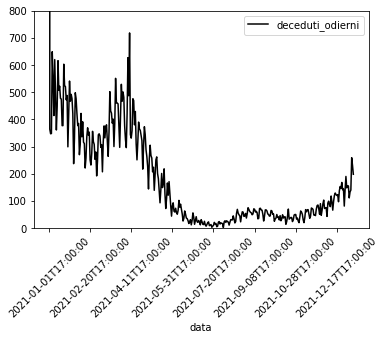

In [65]:
#@title
df = pd.DataFrame({'data':data, 'deceduti_odierni': deceduti_odierni})
print(df.tail())
df.plot(x='data', rot=45, ylim=(0,800), color = 'black')

#grafico tasso di positività

                    data  tasso_di_positivita
366  2022-01-02T17:00:00            21.907455
367  2022-01-03T17:00:00            15.281561
368  2022-01-04T17:00:00            13.907734
369  2022-01-05T17:00:00            17.281986
370  2022-01-06T17:00:00            19.277789


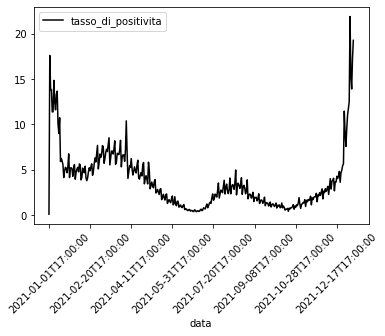

In [66]:
#@title
df = pd.DataFrame({'data':data, 'tasso_di_positivita': tasso_di_positivita})
print(df.tail())
df.plot(x='data', rot=45, color = 'black')